In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
x_data = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y_data = np.array([[0], [1], [1], [0]])

input_size = 2
hidden_size = 2
output_size = 1

In [78]:
np.random.seed(42)

# Initialize
weights_input_hidden = 10 * np.random.random((input_size, hidden_size)) - 5
biases_hidden = 10 * np.random.rand(1, hidden_size) - 5

weights_hidden_output = 10 * np.random.random((hidden_size, output_size)) - 5
biases_output = 10 * np.random.rand(1, output_size) - 5

learning_rate = 0.1
epochs = 10000

error = np.ones((4,1))
j=0
all_error = []
for epoch in range(epochs+1):
    j+=1
    
    if np.all(np.abs(error) < 0.05):
        print(j)
        break

    hidden_input = np.dot(x_data, weights_input_hidden) + biases_hidden
    hidden_output = sigmoid(hidden_input)

    output_input = np.dot(hidden_output, weights_hidden_output) + biases_output
    predicted_output = sigmoid(output_input)

    error = y_data - predicted_output
    all_error.append(np.abs(error))
    output_delta = error * predicted_output * (1 - predicted_output)

    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * hidden_output * (1 - hidden_output)

    # Update
    weights_hidden_output += learning_rate * hidden_output.T.dot(output_delta)
    biases_output += learning_rate * np.sum(output_delta, axis=0, keepdims=True)

    weights_input_hidden += learning_rate * x_data.T.dot(hidden_delta)
    biases_hidden += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    # Print the error every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {abs(error)}")


print("\nTrained XOR predictions:")
print(predicted_output)
print(np.round(predicted_output))



Epoch 0, Error: [[0.72861123]
 [0.44674279]
 [0.02423072]
 [0.97977469]]
Epoch 1000, Error: [[0.19245475]
 [0.3829939 ]
 [0.34902617]
 [0.65990294]]
Epoch 2000, Error: [[0.13892856]
 [0.3697488 ]
 [0.3373307 ]
 [0.61777153]]
Epoch 3000, Error: [[0.1403268 ]
 [0.14585574]
 [0.14271363]
 [0.16451337]]
Epoch 4000, Error: [[0.10233249]
 [0.09994221]
 [0.09910233]
 [0.11084913]]
Epoch 5000, Error: [[0.08326061]
 [0.07884874]
 [0.07832039]
 [0.08616828]]
Epoch 6000, Error: [[0.07151132]
 [0.06649552]
 [0.06609359]
 [0.0719576 ]]
Epoch 7000, Error: [[0.0634313 ]
 [0.0582668 ]
 [0.05793788]
 [0.06261858]]
Epoch 8000, Error: [[0.05747199]
 [0.05232951]
 [0.05204934]
 [0.05594903]]
Epoch 9000, Error: [[0.05285909]
 [0.0478071 ]
 [0.04756216]
 [0.05090938]]
9757

Trained XOR predictions:
[[0.04999791]
 [0.95496679]
 [0.9551909 ]
 [0.04783603]]
[[0.]
 [1.]
 [1.]
 [0.]]


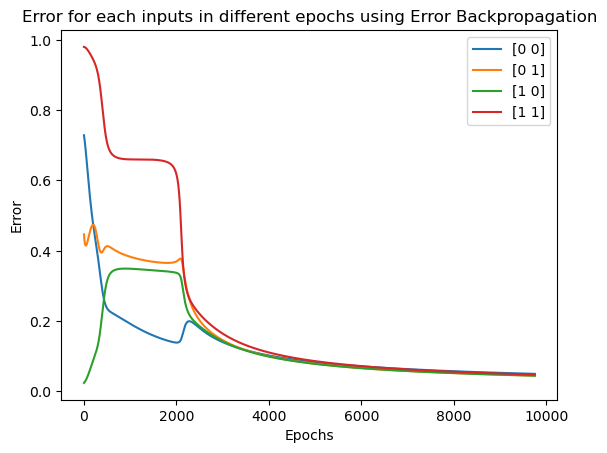

In [79]:
plt_error = np.array(all_error).reshape(len(all_error),4)
plt.plot(plt_error)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error for each inputs in different epochs using Error Backpropagation")
plt.legend((x_data[0],x_data[1],x_data[2],x_data[3]))
plt.show()

## Genetic

In [118]:
# Genetic Algorithm parameters
population_size = 23
num_generations = 300
mutation_rate = 0.1

np.random.seed(42)

# initialize population
def initialize_population(population_size, input_size, hidden_size, output_size):
    return [np.random.uniform(-5, 5, size=(input_size * hidden_size + hidden_size * output_size +hidden_size+ output_size)) for _ in range(population_size)]

# decode a chromosome into weights
def decode_chromosome(chromosome, input_size, hidden_size, output_size):
    weights_input_hidden = chromosome[:input_size * hidden_size+hidden_size].reshape((input_size, hidden_size+1))
    weights_hidden_output = chromosome[input_size * hidden_size+hidden_size:].reshape((hidden_size+1, output_size))
    return weights_input_hidden, weights_hidden_output

# fitness 
def evaluate_fitness(chromosome, input_size, hidden_size, output_size, x_data, y_data):
    weights_input_hidden, weights_hidden_output = decode_chromosome(chromosome, input_size, hidden_size, output_size)

    hidden_layer_input = np.dot(x_data, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)

    mse = np.mean((y_data - predicted_output) ** 2)
    return 1 / mse  

# error
def evaluate_error (population, input_size, hidden_size, output_size, x_data, y_data):
    best_chromosome = max(population, key=lambda x: evaluate_fitness(x, input_size, hidden_size, output_size, x_data, y_data))
    best_weights_input_hidden, best_weights_hidden_output = decode_chromosome(best_chromosome, input_size, hidden_size, output_size)

    hidden_layer_output = sigmoid(np.dot(x_data, best_weights_input_hidden))
    predicted_output = sigmoid(np.dot(hidden_layer_output, best_weights_hidden_output))

    error = np.abs(y_data - predicted_output)
    return error

# one-point crossover 
def crossover(parent1, parent2):
    crossover_point = np.random.randint(0, len(parent1))
    child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    return child

# mutation
def mutate(child, mutation_rate):
    mutation_mask = (np.random.rand(len(child)) < mutation_rate)
    child[mutation_mask] += np.random.uniform(-0.5, 0.5, size=np.sum(mutation_mask))
    return child

In [119]:
# Main Genetic Algorithm

# Initialize population
population = initialize_population(population_size, input_size, hidden_size, output_size)
error = []
for generation in range(num_generations):
    # Evaluate fitness
    fitness_scores = [evaluate_fitness(chromosome, input_size, hidden_size, output_size, x_data, y_data) for chromosome in population]
    error.append(evaluate_error(population, input_size, hidden_size, output_size, x_data, y_data))
    
    # Select the top individuals based on fitness
    selected_indices = np.argsort(fitness_scores)[-population_size // 2:]
    selected_population = [population[i] for i in selected_indices]
    
    # Crossover and mutation 
    new_population = []
    while len(new_population) < population_size:
        parent1 = selected_population[np.random.randint(0, len(selected_population))]
        parent2 = selected_population[np.random.randint(0, len(selected_population))]
        child = crossover(parent1, parent2)
        child = mutate(child, mutation_rate)
        new_population.append(child)

    population = new_population
    
# Select the best individual
best_chromosome = max(population, key=lambda x: evaluate_fitness(x, input_size, hidden_size, output_size, x_data, y_data))
best_weights_input_hidden, best_weights_hidden_output = decode_chromosome(best_chromosome, input_size, hidden_size, output_size)


print("\nFinal Predictions:")
hidden_layer_output = sigmoid(np.dot(x_data, best_weights_input_hidden))
predicted_output = sigmoid(np.dot(hidden_layer_output, best_weights_hidden_output))
for i in range(len(x_data)):
    print(f"Input: {x_data[i]}, Predicted Output: {round(predicted_output[i][0])}, Actual Output: {y_data[i][0]}")


Final Predictions:
Input: [0 0], Predicted Output: 0, Actual Output: 0
Input: [0 1], Predicted Output: 1, Actual Output: 1
Input: [1 0], Predicted Output: 1, Actual Output: 1
Input: [1 1], Predicted Output: 0, Actual Output: 0


In [120]:
errors = np.array(error).reshape(num_generations,4)
print(errors.shape)

(300, 4)


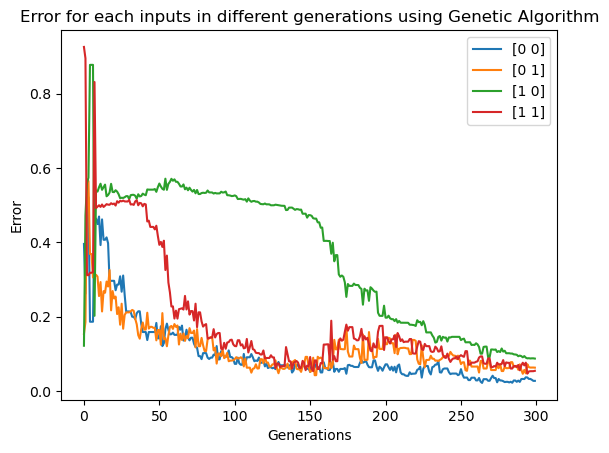

In [121]:
plt.plot(errors)
plt.xlabel("Generations")
plt.ylabel("Error")
plt.title("Error for each inputs in different generations using Genetic Algorithm")
plt.legend((x_data[0],x_data[1],x_data[2],x_data[3]))
plt.show()